In [1]:
%matplotlib inline

from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

# Generate a pass manager without providing a backend
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.primitives import StatevectorSampler

import matplotlib.pyplot as plt

In [2]:
# Define a function to create and measure a given Bell state
def create_bell_state(state_label):
    circuit = QuantumCircuit(2, 2)  # Two qubits, two classical bits
    circuit.h(0)  # Apply Hadamard gate to the first qubit
    circuit.cx(0, 1)  # Apply CNOT gate with qubit 0 as control and qubit 1 as target
    
    if state_label == 'Phi-':
        circuit.z(0)  # Apply Z gate to first qubit
    elif state_label == 'Psi+':
        circuit.x(1)  # Apply X gate to second qubit
    elif state_label == 'Psi-':
        circuit.x(1)  # Apply X gate to second qubit
        circuit.z(0)  # Apply Z gate to first qubit
    
    # circuit.barrier([0,1])
    # Measure the qubits
    circuit.measure_all()
    
    return circuit

In [3]:
# Define the four Bell states
bell_states = {'Phi+': create_bell_state('Phi+'),
               'Phi-': create_bell_state('Phi-'),
               'Psi+': create_bell_state('Psi+'),
               'Psi-': create_bell_state('Psi-')}

In [4]:
pm = generate_preset_pass_manager(optimization_level=1)
sampler = StatevectorSampler()

 > Result class: <class 'qiskit.primitives.containers.sampler_pub_result.SamplerPubResult'>
Results for Phi+ are: {'00': 531, '11': 493}


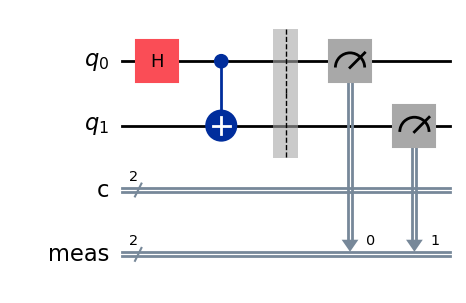

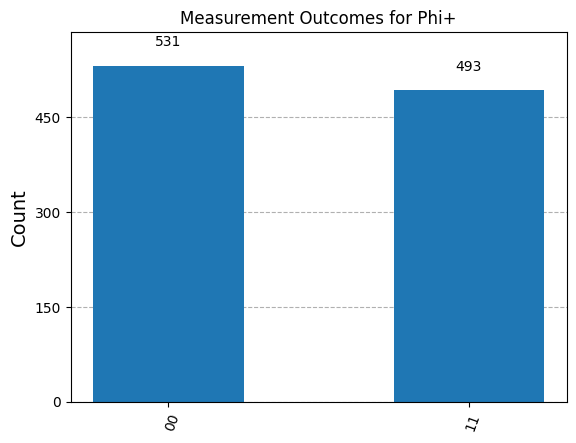

 > Result class: <class 'qiskit.primitives.containers.sampler_pub_result.SamplerPubResult'>
Results for Phi- are: {'00': 476, '11': 548}


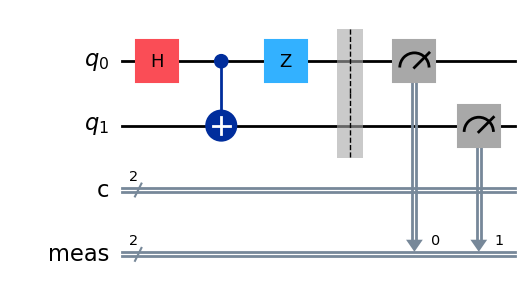

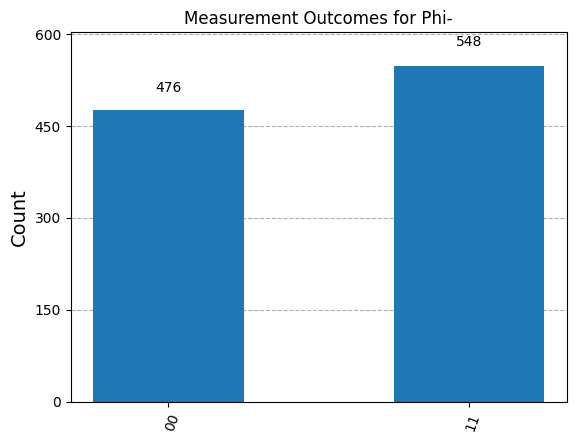

 > Result class: <class 'qiskit.primitives.containers.sampler_pub_result.SamplerPubResult'>
Results for Psi+ are: {'10': 514, '01': 510}


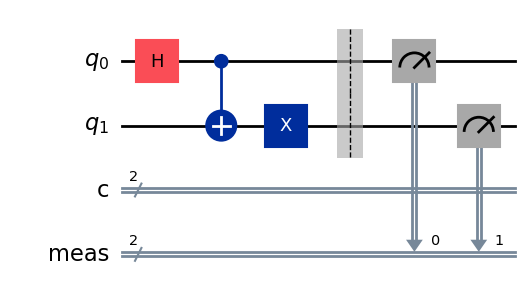

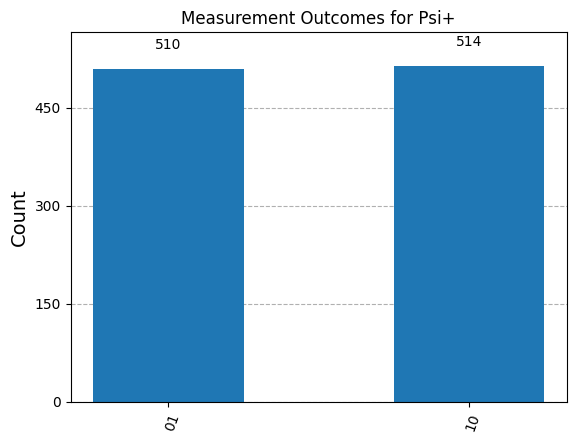

 > Result class: <class 'qiskit.primitives.containers.sampler_pub_result.SamplerPubResult'>
Results for Psi- are: {'10': 489, '01': 535}


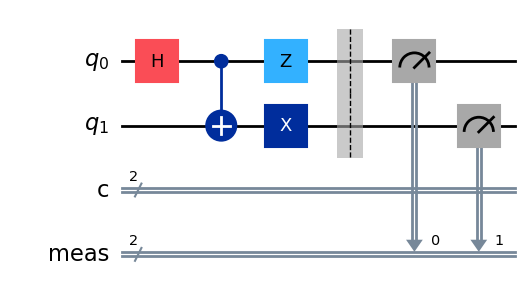

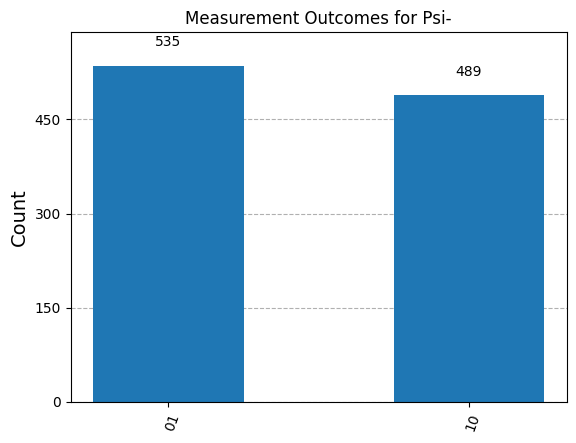

In [5]:
# Run and display results for each Bell state
results = {}
for label, circuit in bell_states.items():
    isa_circuit = pm.run(circuit)
    
    job = sampler.run([isa_circuit]) # execute 1 circuit with Sampler

    pub_result = job.result()[0]
    print(f" > Result class: {type(pub_result)}")

    data_pub = pub_result.data # Access result data for PUB 0
    bitstrings = data_pub.meas.get_bitstrings() # Access bitstring for the classical register "meas"
    # print(f"The number of bitstrings is: {len(bitstrings)}")
    counts = data_pub.meas.get_counts() # Get counts for the classical register "meas"

    results[label] = counts
    print(f"Results for {label} are: {counts}")

    circuit.draw("mpl", style="iqp")
    plt.show()
    plot_histogram(counts, title=f'Measurement Outcomes for {label}')
    plt.show()